# ARIMA example
* In this example we will show how to use the ZRXPFormat to read time series data from ZRXP files and how to apply an ARIMA model to better understand the data or to predict future points in the series

In [1]:
import platform
import pkg_resources
from IPython.core.display import display, HTML
from matplotlib import pyplot
from pandas import DataFrame
from statsmodels.tsa.arima_model import ARIMA
from datetime import datetime
from kisters.water.time_series.file_io import ZRXPFormat

In [2]:
# Version information
data = [['Python', platform.python_version() + ' ' + platform.architecture()[0]],
          ['OS', platform.platform()],
          ['pandas', pkg_resources.require("pandas")[0].version],
          ['matplotlib', pkg_resources.require("matplotlib")[0].version],
          ['statsmodels', pkg_resources.require("statsmodels")[0].version],
          ['kisters.water.time_series', pkg_resources.require("kisters.water.time_series")[0].version]]
html = "<table>"
html += "<tr><th style=\"text-align:left\">Software</th><th style=\"text-align:left\">Version</th></tr>"
for name, version in data:
    html += "<tr><td style=\"text-align:left\">%s</td><td style=\"text-align:left\">%s</td></tr>" % (name, version)
html += "<tr><td style=\"text-align:left\">%s</td></tr>" % (datetime.now().strftime('%c'))
html += "</table>"
display(HTML(html))

In [3]:
zrxp = ZRXPFormat()
reader = zrxp.reader

tslist = list(reader.read("../testdata/K-Greim-SG-cmd-2000-2004.zrx"))
ts = tslist[0]

hourly = ts.read_data_frame().resample("H").mean()

In [4]:
full = DataFrame(hourly["value"])
series = full[full.index < '2003-01-01 00:00:00']
series = series[series.index > '2002-10-01 00:00:00']

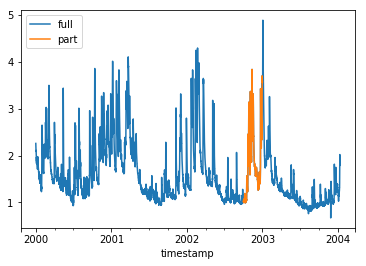

In [ ]:
full["value"].plot(label="full")
series["value"].plot(label="part")
pyplot.legend(loc=2)
pyplot.show()

In [ ]:
model = ARIMA(series, order=(5,0,2), freq='H')
model_fit = model.fit(disp=0)
print(model_fit.summary())

residuals = DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

In [ ]:
residuals.plot(kind='kde')
pyplot.show()
print(residuals.describe())

In [ ]:
pyplot.figure(figsize=(15, 5))
part = full[full.index > '2002-12-30 00:00:00']
part = part[part.index < '2003-01-03 00:00:00']
part["value"].plot(label=ts.path, figsize=(15, 5))
predicted = model_fit.predict(start=len(series) - 48, end=len(series) + 48)
DataFrame(predicted)[0].plot(label="Predict", figsize=(15, 5))
pyplot.legend(loc=2)
pyplot.show()